In [1]:
import sys
import math
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [2]:
df = pd.read_csv('./NHIS_OPEN_GJ_2018_100.csv')

In [3]:
df.shape

(1000000, 34)

In [4]:
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999586.000000,999747.000000,999734.000000,999783.000000,999783.000000,994270.000000,994270.000000,994085.000000,332756.000000,332748.000000,332746.000000,325878.000000,994086.000000,989430.000000,994094.000000,994094.000000,994094.000000,994091.000000,999766.000000,645057.000000,1000000.000000,399992.000000,0.0,0.0,0.0,399993.000000,1000000.0
mean,2018.0,500000.500000,1.464400,10.596769,33.696380,162.292530,63.589255,81.463490,0.976794,0.974457,1.033691,1.032349,122.669335,76.074278,100.868015,195.911052,136.162159,56.421913,113.439281,14.290730,1.097214,0.864442,26.301625,26.287882,37.607043,1.606761,0.999983,0.399993,0.215164,NaN,NaN,NaN,0.604551,20191219.0
std,0.0,288675.278933,0.498731,2.879269,12.677639,9.335381,12.730227,10.228128,0.605965,0.602352,0.180433,0.176925,14.624761,10.012275,24.111387,40.563860,102.840647,18.576129,38.683032,1.579671,0.439956,0.498879,26.367652,27.275675,50.606656,0.816770,0.004129,0.489897,0.410937,NaN,NaN,NaN,0.592357,0.0
min,2018.0,1.000000,1.000000,5.000000,11.000000,125.000000,30.000000,1.000000,0.100000,0.100000,1.000000,1.000000,63.000000,27.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,20191219.0
25%,2018.0,250000.750000,1.000000,8.000000,27.000000,155.000000,55.000000,75.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,89.000000,169.000000,77.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,20191219.0
50%,2018.0,500000.500000,1.000000,11.000000,41.000000,160.000000,60.000000,81.300000,1.000000,1.000000,1.000000,1.000000,121.000000,76.000000,96.000000,194.000000,111.000000,54.000000,112.000000,14.300000,1.000000,0.800000,23.000000,20.000000,24.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,20191219.0
75%,2018.0,750000.250000,2.000000,13.000000,43.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,221.000000,163.000000,65.000000,136.000000,15.400000,1.000000,1.000000,29.000000,30.000000,40.000000,2.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000,20191219.0
max,2018.0,1000000.000000,2.000000,18.000000,50.000000,190.000000,135.000000,999.000000,9.900000,9.900000,2.000000,2.000000,267.000000,173.000000,872.000000,2386.000000,4765.000000,1348.000000,2332.000000,24.000000,6.000000,97.000000,9999.000000,5896.000000,999.000000,3.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2.000000,20191219.0


In [5]:
df = df[['성별코드','신장(5Cm단위)','체중(5Kg단위)','허리둘레','수축기혈압','이완기혈압','식전혈당(공복혈당)','HDL콜레스테롤','요단백','혈청크레아티닌','흡연상태','음주여부']].copy()
df.head() #필요없는 column제거

,성별코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),HDL콜레스테롤,요단백,혈청크레아티닌,흡연상태,음주여부
0,2,160,60,79.5,110.0,60.0,96.0,NaN,1.0,0.5,1.0,NaN
1,1,170,55,69.3,128.0,78.0,79.0,NaN,1.0,1.0,1.0,1.0
2,1,165,70,85.0,128.0,65.0,80.0,NaN,NaN,1.1,2.0,1.0
3,2,150,45,71.5,151.0,89.0,100.0,80.0,1.0,0.6,1.0,NaN
4,2,145,50,77.0,114.0,62.0,124.0,NaN,1.0,0.5,1.0,1.0


In [6]:
df.isnull().sum()

성별코드               0
신장(5Cm단위)          0
체중(5Kg단위)          0
허리둘레             414
수축기혈압           5730
이완기혈압           5730
식전혈당(공복혈당)      5915
HDL콜레스테롤      667254
요단백            10570
혈청크레아티닌         5906
흡연상태             234
음주여부          354943
dtype: int64

In [7]:
df = df.drop(['HDL콜레스테롤'],axis=1)
df['음주여부'] = df['음주여부'].fillna(0)
df

,성별코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,흡연상태,음주여부
0,2,160,60,79.5,110.0,60.0,96.0,1.0,0.5,1.0,0.0
1,1,170,55,69.3,128.0,78.0,79.0,1.0,1.0,1.0,1.0
2,1,165,70,85.0,128.0,65.0,80.0,NaN,1.1,2.0,1.0
3,2,150,45,71.5,151.0,89.0,100.0,1.0,0.6,1.0,0.0
4,2,145,50,77.0,114.0,62.0,124.0,1.0,0.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
999995,2,165,75,84.0,110.0,70.0,107.0,1.0,0.7,1.0,0.0
999996,1,170,75,88.0,136.0,88.0,114.0,1.0,1.0,1.0,1.0
999997,1,175,80,87.0,162.0,90.0,98.0,1.0,0.9,2.0,1.0
999998,1,165,70,80.2,140.0,98.0,94.0,1.0,1.2,2.0,0.0


In [8]:
df = df.dropna(subset=['허리둘레','수축기혈압','이완기혈압','식전혈당(공복혈당)','흡연상태','음주여부']) #결측치있는행 모두제거
df

,성별코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,흡연상태,음주여부
0,2,160,60,79.5,110.0,60.0,96.0,1.0,0.5,1.0,0.0
1,1,170,55,69.3,128.0,78.0,79.0,1.0,1.0,1.0,1.0
2,1,165,70,85.0,128.0,65.0,80.0,NaN,1.1,2.0,1.0
3,2,150,45,71.5,151.0,89.0,100.0,1.0,0.6,1.0,0.0
4,2,145,50,77.0,114.0,62.0,124.0,1.0,0.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
999995,2,165,75,84.0,110.0,70.0,107.0,1.0,0.7,1.0,0.0
999996,1,170,75,88.0,136.0,88.0,114.0,1.0,1.0,1.0,1.0
999997,1,175,80,87.0,162.0,90.0,98.0,1.0,0.9,2.0,1.0
999998,1,165,70,80.2,140.0,98.0,94.0,1.0,1.2,2.0,0.0


In [9]:
df['허리둘레'].value_counts().sort_index()

1.0       1
7.4       1
8.6       1
24.0      1
26.5      1
         ..
135.0     4
136.0     1
139.0     1
140.0     1
999.0    13
Name: 허리둘레, Length: 742, dtype: int64

In [10]:
df = df.loc[df["허리둘레"] > 10] #허리둘레 이상치 있는 행 제거
df = df.loc[df["허리둘레"] < 200]
df['허리둘레'].value_counts().sort_index()

24.0     1
26.5     1
31.0     1
34.0     1
40.0     1
        ..
134.0    1
135.0    4
136.0    1
139.0    1
140.0    1
Name: 허리둘레, Length: 738, dtype: int64

In [11]:
df['수축기혈압'].value_counts().sort_index() #혈압 이상치없음

63.0     2
66.0     2
70.0     5
71.0     3
72.0     3
        ..
241.0    1
242.0    1
249.0    1
250.0    1
267.0    1
Name: 수축기혈압, Length: 169, dtype: int64

In [12]:
df['이완기혈압'].value_counts().sort_index() #혈압 이상치없음

27.0     1
28.0     1
29.0     3
30.0     1
31.0     1
        ..
160.0    3
161.0    1
169.0    1
170.0    1
173.0    1
Name: 이완기혈압, Length: 134, dtype: int64

In [13]:
df['식전혈당(공복혈당)'].value_counts().sort_index() #혈당 이상치 없음

23.0     2
27.0     1
28.0     1
29.0     1
31.0     1
        ..
710.0    1
744.0    1
752.0    1
831.0    1
872.0    1
Name: 식전혈당(공복혈당), Length: 494, dtype: int64

In [14]:
df.isnull().sum()

성별코드             0
신장(5Cm단위)        0
체중(5Kg단위)        0
허리둘레             0
수축기혈압            0
이완기혈압            0
식전혈당(공복혈당)       0
요단백           4677
혈청크레아티닌          1
흡연상태             0
음주여부             0
dtype: int64

In [15]:
diabete = df["식전혈당(공복혈당)"].copy()

def is_diabete(x):
    if(x > 126):
        return 1
    else:
        return 0

diabete = diabete.apply(is_diabete)
df["당뇨병"] = diabete #당뇨병 컬럼 추가

In [16]:
obesity = df[['성별코드','허리둘레']].copy() 
obesity["복부비만"] = 0
obesity.loc[(obesity['성별코드'] == 1) & (obesity['허리둘레'] >= 90),'복부비만'] = 1
obesity.loc[(obesity['성별코드'] == 2) & (obesity['허리둘레'] >= 85),'복부비만'] = 1
df["복부비만"] = obesity["복부비만"] #복부비만 컬럼 추가

In [17]:
weight = df[['신장(5Cm단위)', '체중(5Kg단위)']].copy()

weight['BMI'] = weight['체중(5Kg단위)'] / ( (weight['신장(5Cm단위)'] / 100) * (weight['신장(5Cm단위)']/100) )

df['BMI'] = weight['BMI'] #bmi컬럼 추가

In [18]:
bmi = df['BMI'].copy()
def bmi_code(x):
    if(x < 25):
        return 0
    elif(x >= 25):
        return 1

bmi = bmi.apply(bmi_code)
df["BMI코드"] = bmi #bmi코드 컬럼 추가

In [19]:
blood_pressure = df[['이완기혈압', '수축기혈압']].copy()
blood_pressure["고혈압"] = 0
blood_pressure.loc[(blood_pressure['이완기혈압'] >= 90) | (blood_pressure['수축기혈압'] >= 140),'고혈압'] = 1
df["고혈압"] = blood_pressure["고혈압"]

In [20]:
df.describe()

,성별코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,흡연상태,음주여부,당뇨병,복부비만,BMI,BMI코드,고혈압
count,993414.000000,993414.000000,993414.000000,993414.000000,993414.000000,993414.000000,993414.000000,988737.000000,993413.000000,993414.000000,993414.000000,993414.000000,993414.000000,993414.000000,993414.000000,993414.000000
mean,1.462978,162.349418,63.634613,81.436983,122.674028,76.078839,100.874688,1.097210,0.864574,1.608362,0.647806,0.076004,0.243790,24.010977,0.347955,0.136288
std,0.498628,9.312794,12.732232,9.678096,14.622746,10.010594,24.113068,0.440014,0.498998,0.817360,0.477654,0.265004,0.429367,3.556911,0.476322,0.343094
min,1.000000,125.000000,30.000000,24.000000,63.000000,27.000000,23.000000,1.000000,0.100000,1.000000,0.000000,0.000000,0.000000,13.333333,0.000000,0.000000
25%,1.000000,155.000000,55.000000,75.000000,112.000000,70.000000,89.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,21.484375,0.000000,0.000000
50%,1.000000,160.000000,60.000000,81.200000,121.000000,76.000000,96.000000,1.000000,0.800000,1.000000,1.000000,0.000000,0.000000,23.875115,0.000000,0.000000
75%,2.000000,170.000000,70.000000,88.000000,131.000000,82.000000,105.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,26.122449,1.000000,0.000000
max,2.000000,190.000000,135.000000,140.000000,267.000000,173.000000,872.000000,6.000000,97.000000,3.000000,1.000000,1.000000,1.000000,44.081633,1.000000,1.000000


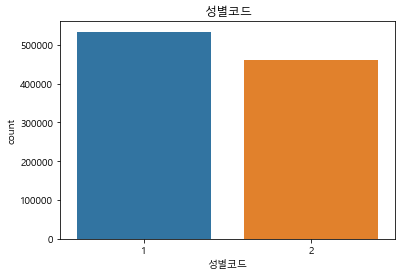

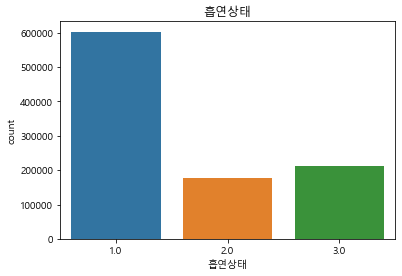

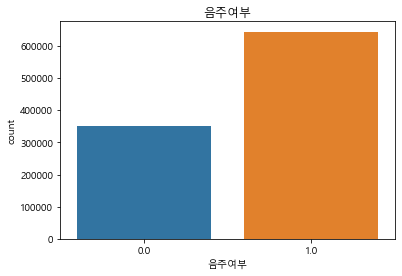

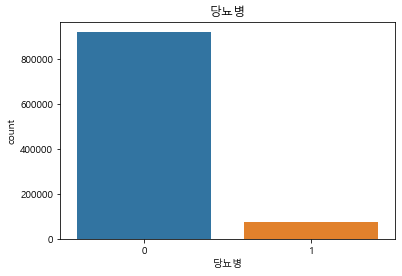

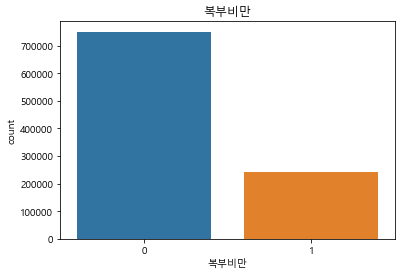

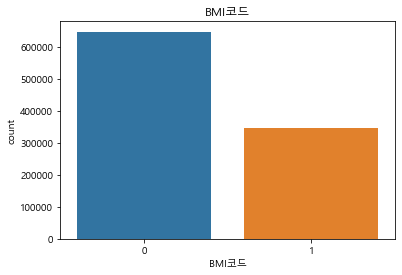

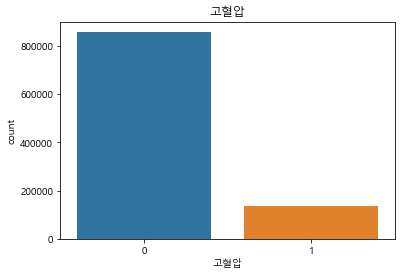

In [34]:
def get_plot(column_name, df):
    if(df[column_name].value_counts().shape[0]) > 100:
        plt.figure(figsize=(30,5))
    sns.countplot(x=column_name, data=df)
    plt.title(column_name)
    plt.show()
    
colums=['성별코드','흡연상태','음주여부','당뇨병','복부비만','BMI코드','고혈압']

for c in colums:
    get_plot(c,df)

<h3>엔트로피, 정보증가량</h3>

-범주형 값을 가지는 속성만 그룹으로 나눔 <br/>
-수치형 속성은 분할점 어떻게???

In [35]:
def getEntropy(df, feature) :
    unique = list(df[feature].unique()) 
    entropy = 0
    for i in range(len(unique)):
        p = len(df[df[feature] == unique[i]])/len(df[feature])
        entropy = entropy - p*math.log(p,2)
    return(entropy)

In [36]:
getEntropy(df,"당뇨병") ##당뇨병 속성에 대한 전체 엔트로피

0.3879385068372623

In [40]:
def getGainA(df, g_feature,t_feature): #g_feature속성으로 그룹을 나눴을때 정보증가량
    info_D = getEntropy(df, t_feature) 
    
    
    
    info_Di = 0
    unique = list(df[g_feature].unique()) 
    for i in range(len(unique)):
        new = df.loc[df[g_feature] == unique[i]]
        info_Di += (len(new[g_feature])/len(df[g_feature])) *(getEntropy(new, t_feature))

    gain = info_D - info_Di
        
        
        
    return(gain)
print(getGainA(df, "성별코드","당뇨병"))
print(getGainA(df, "흡연상태","당뇨병"))
print(getGainA(df, "음주여부","당뇨병"))
print(getGainA(df, "복부비만","당뇨병"))
print(getGainA(df, "BMI코드","당뇨병"))
print(getGainA(df, "고혈압","당뇨병"))

0.00396888318265165
0.003223549138811177
0.0006056281714025835
0.009322864076940607
0.006703522235947723
0.005002757530334634


복부비만 속성이 정보증가량이 제일 높음 -> 더 많은 정보를 제공